<a href="https://colab.research.google.com/github/Divyansh9125/Deep-Learning/blob/master/Hough%20Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Hough Transform code written by me to detect lines in images.

In [31]:
#importing necessary packages
from google.colab.patches import cv2_imshow
import numpy as np
import math as m
import cv2

%matplotlib inline

print("Imported all required packages :)")

Imported all required packages :)


Shape of this grayscale image is: (256, 256)
Type of this grayscale image is: <class 'numpy.ndarray'>


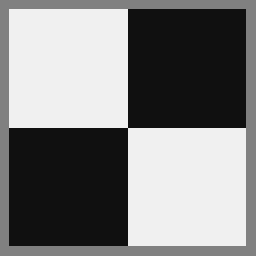

In [143]:
#importing the input image and converting it into grayscale
img_path = '../content/ps1-input0.png'
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Shape of this grayscale image is:", img_gray.shape)
print("Type of this grayscale image is:", type(img_gray))
cv2_imshow(img_gray)

This edge image is an binary image containing only 0 and 255.
The shape of this edge image: (256, 256)
Type of this edge image is: <class 'numpy.ndarray'>


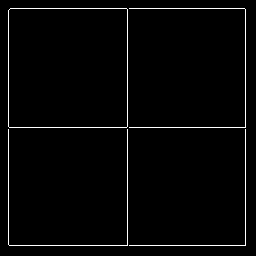

In [144]:
#Applying canny edge detector to generate an edged and binary image
img_gray_edge = cv2.Canny(img_gray, 100, 200)

print("This edge image is an binary image containing only 0 and 255.")
print("The shape of this edge image:", img_gray_edge.shape)
print("Type of this edge image is:", type(img_gray_edge))
cv2_imshow(img_gray_edge)

In [0]:
#Hough transform function
def houghTranshform(src_img, theta_steps, rho_steps):
  height, width = src_img.shape
  diag_len = int(m.sqrt(height**2 + width**2))
  rho_s = list(map(int, range(0, diag_len, rho_steps)))
  theta_s = list(map(int, range(0, 360, theta_steps)))

  accumulator = np.zeros((len(rho_s), len(theta_s)), dtype=int)

  y_indexs, x_indexs = np.nonzero(src_img)

  for i in range(img_gray_edge.shape[1]):
    for j in range(img_gray_edge.shape[0]):
      if img_gray_edge[j][i]!=0:
        for theta in theta_s:
          rho = i*m.cos(m.radians(theta)) + j*m.sin(m.radians(theta))
          accumulator[abs(int(rho))][int(theta)]+=1

  return accumulator

In [146]:
theta_step = int(input("Enter the value for step size of theta: "))
rho_step = int(input("Enter the value for step size of rho: "))
accumulator = houghTranshform(src_img=img_gray_edge, theta_steps=theta_step, rho_steps=rho_step)

Enter the value for step size of theta: 1
Enter the value for step size of rho: 1


Now getting the peaks in accumulator

In [147]:
#finding peaks
num_peaks = int(input("Enter the number of peaks to be considered: "))
peaks = np.zeros((1, num_peaks), dtype=int).flatten()
t = np.zeros((1, num_peaks), dtype=int).flatten()
r = np.zeros((1, num_peaks), dtype=int).flatten()

for x in range(num_peaks):
  for i in range(accumulator.shape[0]):
    for j in range(accumulator.shape[1]):
      if accumulator[i][j] > peaks[x] and accumulator[i][j] not in peaks:
        peaks[x] = accumulator[i][j]
        t[x] = j
        r[x] = i

Enter the number of peaks to be considered: 16


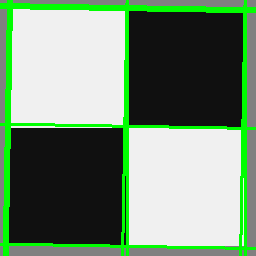

In [148]:
#plotting lines
for x in range(num_peaks):
  a = np.cos(m.radians(t[x]))
  b = np.sin(m.radians(t[x]))
  x0 = a*(r[x])
  y0 = b*(r[x])
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2_imshow(img)